# FORECASTING HIGH-VALUE ZIPCODES BY UTILIZING TIME SERIES ANALYSIS

#### INTRODUCTION.

In the dynamic world of real estate investments, strategic decision-making is crucial for achieving success and maximizing returns. With the advent of advanced data analytics techniques, such as time series modeling, investors now have powerful tools at their disposal to forecast market trends and identify lucrative opportunities

 ![Modern Residential District](4-modern-doral-model-60-exterior.jpeg)


#### PHASE 4 GROUP 1

## SUMMARY:

In this project, we delve into the domain of real estate investment by harnessing the wealth of information provided by the https://www.zillow.com/research/data/ to unlock actionable insights for prospective investors.

## 1. BUSINESS UNDERSTANDING.
STAKEHOLDER; PROSPECT PROPERTY INVESTMENTS.
Our client is an investor with a budget of 300,000 dollars who, after reading articles such as   (https://www.worldbizmagazine.net/post/miami-dade-best-region-in-north-america-for-investment-2021-2022), believes that Miami-Dade County presents the most promising investment opportunities in North America. Inspired by these insights, they seek to leverage data science and real estate expertise to make informed investment decisions in the area.

## BUSINESS PROBLEM:
The client aims to capitalize on the potential highlighted in the articles by identifying lucrative investment opportunities within Miami-Dade County. Specifically, they are interested in properties with high returns on investment (ROI) within a 3-year timeframe.

#### BUSINESS OBJECTIVE:

1.Identify properties in Miami-Dade County with the potential for high ROI within a 3-year timeframe.

2.Analyze historical data, market trends, and economic indicators to forecast future property values and ROI accurately.

3.Provide actionable recommendations to the client based on the analysis to maximize investment returns and minimize risks.

#### RESEARCH QUESTIONS.

1.What are the historical trends in property values and ROI in Miami-Dade County, as highlighted in the articles?

2.How do market trends and economic indicators influence property values and ROI in the area?

3.How reliable are the forecasting models in predicting future property values and ROI in Miami-Dade County?

4.Which specific properties or neighborhoods in Miami-Dade County offer the highest potential for ROI within a 3-year timeframe, considering the insights from the articles?

Addressing these questions will enable Prospect Property Investments to align their investment strategies with the opportunities presented in Miami-Dade County and maximize returns for their client.

## 2. DATA UNDERSTANDING

#### Dataset Summary

RegionID - This is unique Id for the Regions.

SizeRank - This is the ranking done based on the size of the Region.

RegionName - This field contains the zip code of the Region.

RegionType - Type of Region is Zip.

StateName - State.

City - This column provide the specific City Name of Housing Data.

Metro - This provide the name of the metro city around that Region.

County Name - This is the County Name for that Region.

Months Column - These Columns contains the prices of Region for every month.

The dataset covers an extended time period (April 1996 to April 2018), allowing for the exploration of long-term trends and capturing various market conditions. It therefore provides us with  valuable resource for conducting time series analysis and developing predictive models to forecast future prices.

# Step 1. LOAD DATA/ FILTER FOR CHOOSEN ZIPCODES.

#### 1.1  Importing Necessary Libraries 

The pmdarima library, also known as Pyramid ARIMA, is used for automatic ARIMA model selection.It provides a convenient interface for fitting ARIMA models to time series data and automatically selecting the optimal parameters based on information criteria

In [1]:
!pip install pmdarima

In [2]:
#Data Manipulation and Analysis
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations

#Time Series Analysis and Forecasting
import pmdarima as pm # For automatic ARIMA model selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing # For Holt-Winters Exponential Smoothing
from statsmodels.tsa.arima_model import ARIMA # For Autoregressive Integrated Moving Average (ARIMA) modeling
from statsmodels.tsa.statespace.sarimax import SARIMAX # For Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX)
from statsmodels.tsa.seasonal import seasonal_decompose # For decomposition of time series data
from statsmodels.graphics.tsaplots import plot_acf # For plotting autocorrelation function (ACF)
from statsmodels.graphics.tsaplots import plot_pacf # For plotting partial autocorrelation function (PACF)

#Data Visualization
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns # For statistical data visualization


#Other
import warnings # For ignoring warnings
warnings.filterwarnings("ignore")# Filter warnings
import matplotlib.dates as mdates # For formatting dates in plots
from sklearn.metrics import mean_squared_error # For calculating mean squared error
import statsmodels.api as sm # For time series analysis
from statsmodels.tsa.stattools import adfuller # For Augmented Dickey-Fuller test
import math # For mathematical functions

#### 1.2 Loading the Dataset
Let us import our data and take a look at the dataset we get to work with.load the data using the pd.read_csv method and save to the variable name df.

In [3]:
#load dataset into pandas dataframe and view the first 5 rows by calling the df variable.
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


#### 1.3 Inpesting the dataset

In [4]:
#inspect how many rows and columns the data set has 
num_rows, num_cols = df.shape

print("numbers of rows:", num_rows)
print("numbers of columns:", num_cols)

numbers of rows: 14723
numbers of columns: 272


This dataset appears to contain real estate price information for various regions, including the region ID, region name, city, state, metro area, county name, and size rank. The dataset also includes price data for each region spanning from April 1996 to April 2018.The years in this dataset are presented in a wide format, where each column represents a specific month and year combination.this will need to be converted to long-format. This conversion can typically be done using functions like pd.melt()

In [5]:
#inspect the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


# Step 2: DATA PREPROCESSING

Given our client's interest in investing in Miami-Dade County, we will narrow down the dataset to exclusively encompass records within this particular region.

#### 2.1 FILTER FOR CHOOSEN ZIPCODES

In [6]:
#retrieve the datframe that contains the zipcodes from Miami_dade county
new_df = df[df['CountyName']=='Miami-Dade']

#red the new_df dataframe
new_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
60,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale,Miami-Dade,61,337300.0,337900.0,338300.0,...,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
84,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,480200.0,480700.0,481200.0,...,2917100,2925700,2942400,2958300,2946300,2912900,2900900,2923300,2933600,2914100
222,72488,33186,The Crossings,FL,Miami-Fort Lauderdale,Miami-Dade,223,120600.0,120500.0,120500.0,...,310600,311800,313700,314800,315300,317500,320700,322800,323900,324500
226,72350,33012,Hialeah,FL,Miami-Fort Lauderdale,Miami-Dade,227,118400.0,118500.0,118500.0,...,300300,302100,304500,306400,307200,308900,311400,314100,317500,320500
376,72460,33157,Village of Palmetto Bay,FL,Miami-Fort Lauderdale,Miami-Dade,377,106400.0,106600.0,106800.0,...,295600,298300,301600,304400,305900,307500,309700,312500,316400,319800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,72473,33170,Goulds,FL,Miami-Fort Lauderdale,Miami-Dade,8157,89500.0,89300.0,89000.0,...,247100,249700,252500,254300,254700,255800,257700,259300,261800,264400
8568,72484,33182,Tamiami,FL,Miami-Fort Lauderdale,Miami-Dade,8569,135800.0,136100.0,136300.0,...,358100,359700,361100,362100,361400,361200,362900,363500,362500,362000
10524,72461,33158,Village of Palmetto Bay,FL,Miami-Fort Lauderdale,Miami-Dade,10525,233800.0,234200.0,234500.0,...,621700,619900,618000,616500,616700,618200,618500,621900,629500,634900
10580,72495,33194,Tamiami,FL,Miami-Fort Lauderdale,Miami-Dade,10581,133200.0,132900.0,132700.0,...,319700,321900,324100,325500,325400,325700,327200,327800,327400,327000


We can observe from the above dataframe that the County area is divided into smaller cities within it.

#### 2.2 Inspect data

In [7]:
#inspect the new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 60 to 10766
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 132.2+ KB


 Here's what our dataframe looks like.The dataframe has 62 rows and 272 columns.There are columns with float64, int64, and object data types.The numbers "60 to 10766" indicate the range of index values for the rows displayed in the DataFrame.It is showing rows starting from index 60 up to index 10766. 


In [8]:
# Check for null values in the dataset
null_values = new_df.isnull().sum()

# Display the null value counts
print("Null Values in the Dataset:")
print(null_values)

Null Values in the Dataset:
RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64


We can observe no missing(NaN) values in our dataset.

In [9]:
#check for dupicates
df.duplicated().sum()

0

Our dataset has 0 duplicated values

In [10]:
# Rename the column "RegionName" to "ZipCode"
new_df.rename(columns={'RegionName': 'Zipcode'}, inplace=True)

# convert to categorical dtype
new_df['Zipcode'] = new_df['Zipcode'].astype('str')

# Display the DataFrame with the updated column name
new_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
60,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale,Miami-Dade,61,337300.0,337900.0,338300.0,...,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
84,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,480200.0,480700.0,481200.0,...,2917100,2925700,2942400,2958300,2946300,2912900,2900900,2923300,2933600,2914100
222,72488,33186,The Crossings,FL,Miami-Fort Lauderdale,Miami-Dade,223,120600.0,120500.0,120500.0,...,310600,311800,313700,314800,315300,317500,320700,322800,323900,324500
226,72350,33012,Hialeah,FL,Miami-Fort Lauderdale,Miami-Dade,227,118400.0,118500.0,118500.0,...,300300,302100,304500,306400,307200,308900,311400,314100,317500,320500
376,72460,33157,Village of Palmetto Bay,FL,Miami-Fort Lauderdale,Miami-Dade,377,106400.0,106600.0,106800.0,...,295600,298300,301600,304400,305900,307500,309700,312500,316400,319800


#### 2.3 date to date-time
We begin by converting the column names in the dataframe that represent dates into datetime objects.This conversion allows for easier manipulation and analysis of time-series data. By converting the column names to datetime objects, we can perform various time-based operations such as filtering by date range, resampling at different frequencies, and plotting time-series data accurately.

In [11]:
#The get_datetimes function takes a DataFrame as input and returns only those column names that can be converted into datetime objects
def get_datetimes(new_df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(new_df.columns.values[1:], format='%Y-%m')

#### 2.4 how many cities are in Miami-Dade?
 is crucial for real estate Prospect Property Investments. Knowing the number of cities helps assess market diversity, tailor investment strategies, and prioritize decisions based on local dynamics. This foundational understanding is essential for identifying investment opportunities and maximizing returns within Miami-Dade County.

In [12]:
# Get unique cities in Miami-Dade County
unique_cities = new_df['City'].unique()

# Count the number of unique cities
num_cities = len(unique_cities)

print("Number of cities in Miami-Dade County:", num_cities)


Number of cities in Miami-Dade County: 33


##### 2.5 how are  the zipcodes distributed among the cities?.
Analyzing zip code distribution in Miami-Dade County is crucial for investors like Prospect Property Investments. It reveals property density, growth potential, and market competitiveness across different cities. Understanding these dynamics helps in targeted investment strategies, diversification, and pricing decisions, ultimately maximizing returns in the local real estate market.

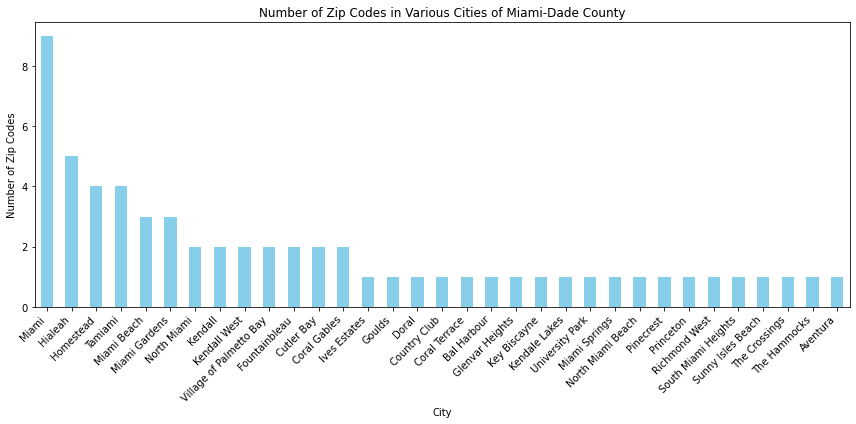

In [13]:
# Group the DataFrame by 'City' and count the number of zip codes in each city
zipcode_counts = new_df.groupby('City')['Zipcode'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
zipcode_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Zip Codes in Various Cities of Miami-Dade County')
plt.xlabel('City')
plt.ylabel('Number of Zip Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The above visualization shows that Miami has the highest number of Zipcode distributions.

#### 2.6 filtering the dataframe to include only zip codes with median house prices under 300,000 dollars.

Filtering the dataframe to include only zip codes with median house prices under 300,000 is essential because it aligns with the budget constraints of the client. By focusing on properties within this price range, the analysis becomes more relevant and actionable for the client's investment objectives.

In [14]:
# Filter the DataFrame to include only zip codes with median house prices under $300,000
budget_df = new_df[new_df['2018-04'] < 300000]
budget_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
838,72428,33125,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,839,98700.0,98700.0,98700.0,...,266400,267200,267800,268000,269000,270800,272400,275100,279700,282900
907,72371,33033,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,908,77100.0,77300.0,77400.0,...,197900,200200,203000,205900,207900,209700,212000,214800,218300,220800
1176,72429,33126,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1177,108600.0,108800.0,109100.0,...,283600,285300,288100,291000,292900,294300,295700,296900,298200,298800
1233,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,85800.0,85800.0,85800.0,...,270700,273000,275200,277600,278800,281000,284700,287800,289400,289800
1398,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,91200.0,91200.0,91100.0,...,262900,265100,268000,270600,272000,273900,276600,279000,280800,282000
2062,72348,33010,Hialeah,FL,Miami-Fort Lauderdale,Miami-Dade,2063,100300.0,100900.0,101500.0,...,260500,266200,272000,276400,279000,281500,284400,286100,287100,288400
2068,72370,33032,Princeton,FL,Miami-Fort Lauderdale,Miami-Dade,2069,87600.0,87400.0,87300.0,...,222500,225000,227500,229900,231400,232800,234500,235500,236600,237900
2451,72472,33169,Miami Gardens,FL,Miami-Fort Lauderdale,Miami-Dade,2452,82900.0,82900.0,82900.0,...,223900,226800,230000,233900,237300,239800,242500,244400,246000,246900
2458,72465,33162,North Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,2459,82300.0,82400.0,82500.0,...,238800,241300,244300,247500,250000,252100,254800,258000,261300,263300
2869,72387,33055,Miami Gardens,FL,Miami-Fort Lauderdale,Miami-Dade,2870,73000.0,73000.0,73000.0,...,229600,233000,236500,239800,242000,243900,247200,250300,252300,253300


#### 2.7 How many zipcodes are in each city?
his information is crucial for several reasons:

. Market Understanding: It helps investors understand the breadth and depth of the real estate market in each city. Cities with a higher number of zip codes may indicate a larger market size or more diverse housing options.

. Investment Focus: Knowing the distribution of zip codes allows investors to focus their attention on specific cities or areas within Miami-Dade County that offer the most potential for investment. They can prioritize areas with a higher concentration of zip codes for further analysis and investment consideration.

. Market Dynamics: Disparities in the number of zip codes among cities can reveal underlying market dynamics such as population density, economic activity, and development trends. Cities with more zip codes may experience higher market competition or greater demand for real estate.

. Risk Assessment: Understanding the distribution of zip codes helps in assessing investment risks. It allows investors to diversify their portfolio by investing in multiple cities or areas with different market characteristics, reducing exposure to localized risks.



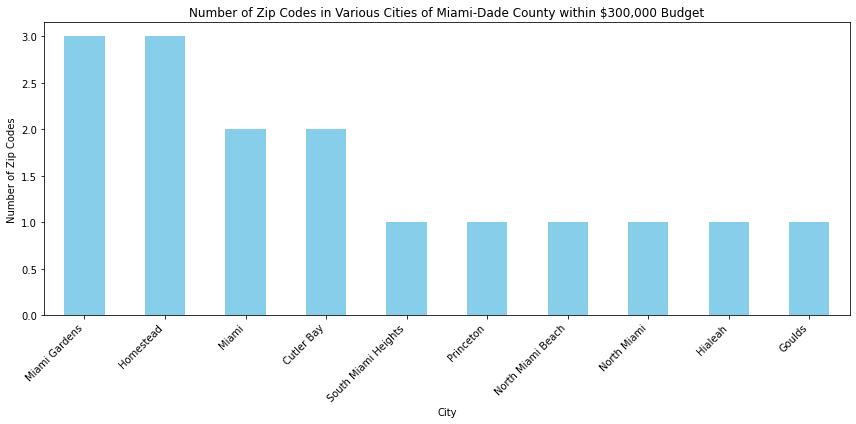

In [15]:
# Group the DataFrame by 'City' and count the number of zip codes in each city
zipcode_counts = budget_df.groupby('City')['Zipcode'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
zipcode_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Zip Codes in Various Cities of Miami-Dade County within $300,000 Budget')
plt.xlabel('City')
plt.ylabel('Number of Zip Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#save the figure
plt.savefig('Zipcode_distrbution.png')

#show the plot
plt.show()


The above is a list of cities that fall under our clients budget of 300,000 dollars.With homestead and miami gardens having the highest number of zipcodes.

# Step 3: EDA and Visualization

#### 3.1 What is the price history of the MiamiDade county since 1996?

now to answer this question there are a few steps we will need to do:
1.Our data is currently in a wide format (each column representing a different time period), you may want to melt it into a long format where each row represents a unique observation (combination of date and zipcode).

2.For time series visualization, it's beneficial to have the date as the index column of your DataFrame. This makes it easier to plot the data over time.

Lets begin.



In [16]:
melted_df = pd.melt(budget_df, 
                    id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], 
                    var_name='Date', 
                    value_name='Price')

# Display the melted DataFrame
melted_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
0,72428,33125,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,839,1996-04,98700.0
1,72371,33033,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,908,1996-04,77100.0
2,72429,33126,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1177,1996-04,108600.0
3,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,1996-04,85800.0
4,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,1996-04,91200.0


In [17]:
#set date as dataset index
melted_df['Date'] = pd.to_datetime(melted_df['Date'])  # Convert 'Date' column to datetime format
melted_df.set_index('Date', inplace=True)  # Set 'Date' column as the index

# Check the index to confirm it's set correctly
melted_df.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=4240, freq=None)

In [18]:
melted_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Price
Date,,,,,,,,
1996-04-01,72428,33125,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,839,98700.0
1996-04-01,72371,33033,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,908,77100.0
1996-04-01,72429,33126,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1177,108600.0
1996-04-01,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,85800.0
1996-04-01,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,91200.0
...,...,...,...,...,...,...,...,...
2018-04-01,72368,33030,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,4147,215600.0
2018-04-01,72491,33189,Cutler Bay,FL,Miami-Fort Lauderdale,Miami-Dade,5091,280800.0
2018-04-01,72373,33035,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,7278,197700.0


#### Q1.What are the historical trends in property values and ROI in Miami-Dade County, as highlighted in the articles?

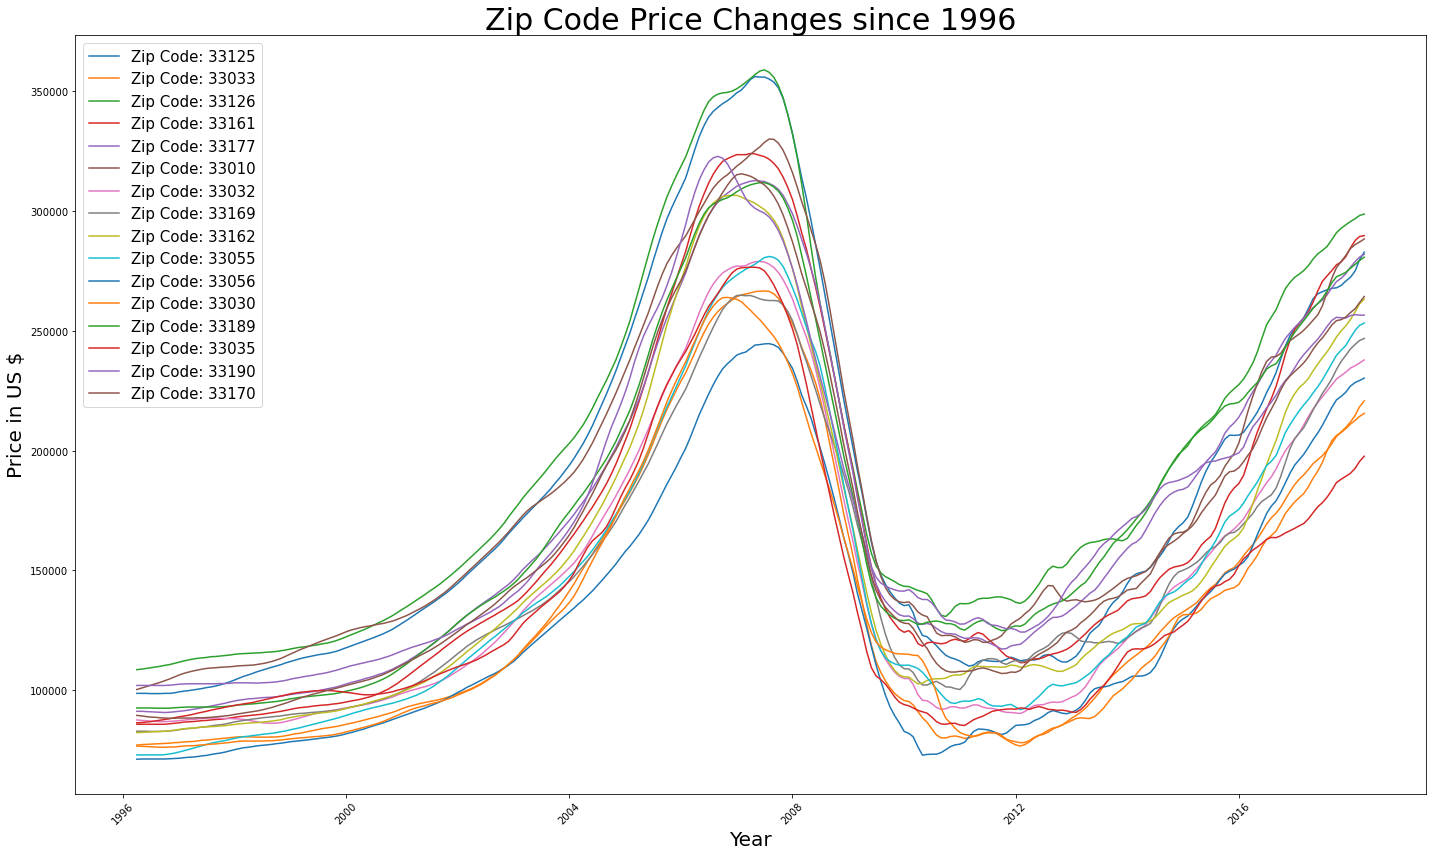

In [19]:
zip_dict = {}

for zipcode in melted_df['Zipcode'].unique():
    zip_dict[zipcode] = melted_df[melted_df['Zipcode'] == zipcode]['Price']

fig, ax = plt.subplots(figsize=(20, 12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode], label=f'Zip Code: {zipcode}')



ax.set_title('Zip Code Price Changes since 1996', fontsize=30)
ax.set_ylabel('Price in US $', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.legend(prop={'size': 15})
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('Zipcode_price_changes.png')

#show plot
plt.show()


From the visualization above, it's evident that there was a peak in housing prices just before the recession hit in 2008. This recession led to a significant decline in housing prices, but since around 2011, we've observed a gradual recovery with prices steadily rising. However, it's noteworthy that as of the latest data, housing prices have yet to reach the peak levels observed in 2007 before the recession occurred.

#### Q2.Which zip code/s exhibits the most substantial growth post-2007 recession, aligning with our objective of identifying the best-growing zip codes while minimizing risks associated with economic downturns such as recessions?

for us to get this information we begin by calculation %ROI and plotting the same.

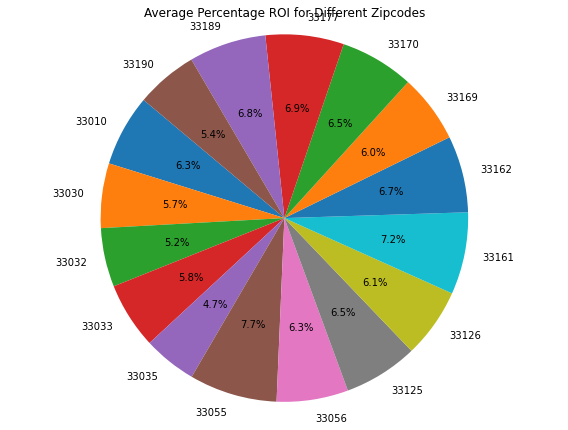

In [20]:
# Calculate ROIfor melted_df
melted_df['ROI'] = ((melted_df['Price'] - melted_df.groupby('Zipcode')['Price'].transform('first')) / melted_df.groupby('Zipcode')['Price'].transform('first')) * 100

# Aggregate ROI for each Zipcode
zipcode_roi = melted_df.groupby('Zipcode')['ROI'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(zipcode_roi, labels=zipcode_roi.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Percentage ROI for Different Zipcodes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

#save figure
plt.savefig('Average_percentage_ROI.png')

#Show the plot
plt.show()


The above pie plot shows the zipcodes that had the highest steady growth after emerging from the 2007 recession.the order goes as follows;

1.zipcode 33055 had a percentage ROI of 7.7%

2.zipcode 33161 had a percentage ROI of 7.2%

3.zipcode 33177 had a percentage ROI of 6.9%

4.zipcode 33189 had a percentage ROI of 6.8%

5.zipcode 33162 had a percentage ROI of 6.7%

these are the 5 best perfoming Zipcodes. 


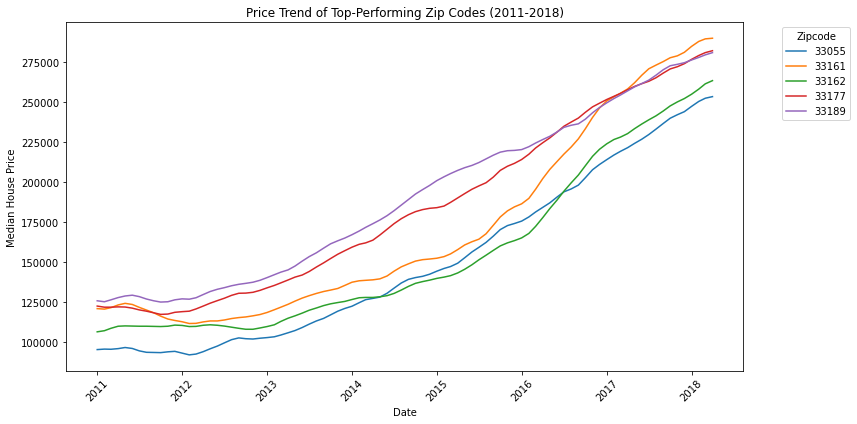

In [21]:
# Filter the data for the selected zip codes and time period
selected_zipcodes = ['33055', '33161', '33177', '33189', '33162']
start_date = '2011-01-01'
end_date = '2018-12-31'

filtered_df = melted_df[(melted_df['Zipcode'].isin(selected_zipcodes)) & 
                        (melted_df.index >= start_date) & 
                        (melted_df.index <= end_date)]

# Plot the trend of each zip code
plt.figure(figsize=(12, 6))
for zipcode, data in filtered_df.groupby('Zipcode'):
    plt.plot(data.index, data['Price'], label=zipcode)

plt.title('Price Trend of Top-Performing Zip Codes (2011-2018)')
plt.xlabel('Date')
plt.ylabel('Median House Price')
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('Top_zipcodes_price_trend.png')

#show plot
plt.show()


# Step 4: Check data for Stationarity

Before fitting the a basic ARIMA model further data preprocessing needs to take place.

### Stationarity Test 

in this section we set focus on only selected zipcodes in Miami-Dade 

In [22]:
# Filter the data for the selected zip codes and time period
selected_zipcodes = ['33055', '33161', '33177', '33189', '33162']

dade_df = melted_df[melted_df['Zipcode'].isin(selected_zipcodes)]
dade_df.head()


,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Price,ROI
Date,,,,,,,,,
1996-04-01,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,85800.0,0.0
1996-04-01,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,91200.0,0.0
1996-04-01,72465,33162,North Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,2459,82300.0,0.0
1996-04-01,72387,33055,Miami Gardens,FL,Miami-Fort Lauderdale,Miami-Dade,2870,73000.0,0.0
1996-04-01,72491,33189,Cutler Bay,FL,Miami-Fort Lauderdale,Miami-Dade,5091,92600.0,0.0


### 4.0 Visualizing the Trend 
we perform a plot showing trends as we compare the 5 zipcodes, to give us insight on our data of interest 

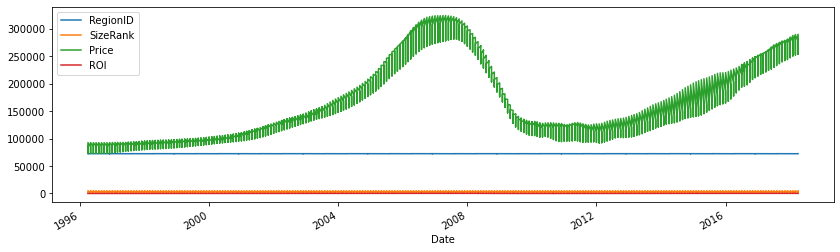

In [23]:
dade_df.plot(figsize = (14,4))
plt.show();

from the visual we see that
- No specified mean or variance across the Zipcodes 
- A strong dependence over time

### 4.1 Stationarity Test 

Stationarity tests are pivotal in time series analysis for evaluating if a dataset maintains consistent statistical properties, like mean, variance, and autocovariance, over time. This stability is fundamental for various time series models, like ARIMA, to function accurately. Stationary time series offer stable statistical properties, aiding in easier analysis and forecasting with better accuracy. Moreover, stationarity is crucial for conducting reliable statistical tests and making valid inferences about the data. Tests like ADF ascertain stationarity by testing specific null hypotheses. If rejected, indicating non-stationarity, additional processing like differencing may be needed. Overall, stationarity tests are indispensable for ensuring the credibility and robustness of time series analysis and modeling.

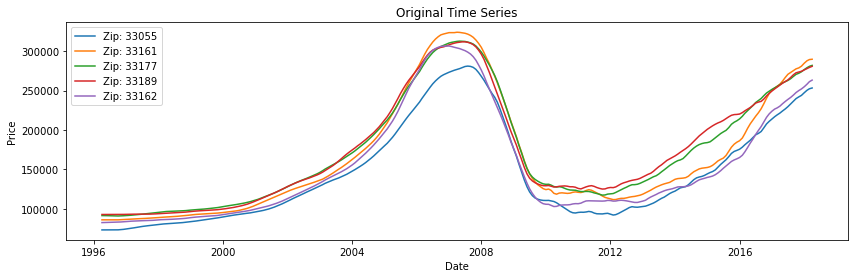

Zip:  33055
ADF Statistic -1.943155
p-value: 0.312040


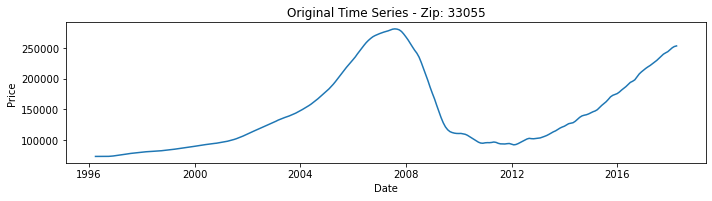

Zip:  33161
ADF Statistic -1.975033
p-value: 0.297627


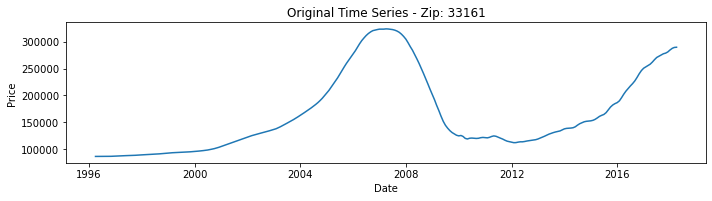

Zip:  33177
ADF Statistic -2.030712
p-value: 0.273271


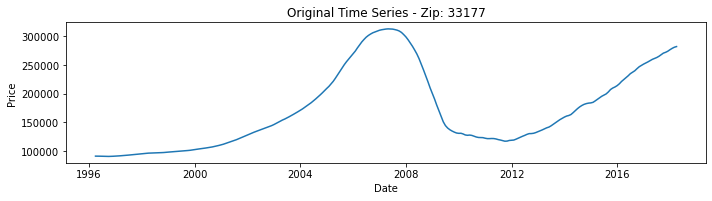

Zip:  33189
ADF Statistic -2.045301
p-value: 0.267070


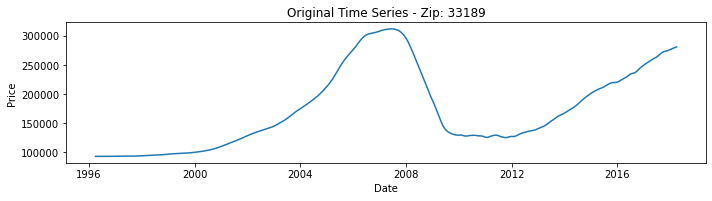

Zip:  33162
ADF Statistic -2.273759
p-value: 0.180571


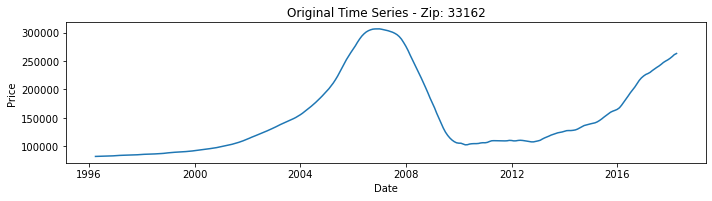

In [24]:
# Filter the data for the selected zip codes
selected_zipcodes = ['33055', '33161', '33177', '33189', '33162']

# 'dade_df' is the DataFrame containing the data
dade_df = melted_df[melted_df['Zipcode'].isin(selected_zipcodes)]

# Plot the original time series for all selected zip codes
plt.figure(figsize=(14, 4))
for z in selected_zipcodes:
    df_z = dade_df[dade_df['Zipcode'] == z]
    plt.plot(df_z.index, df_z['Price'], label='Zip: ' + z)
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Iterate over each zip code in the list of selected zip codes
for z in selected_zipcodes:
    # Extract data for the current zip code from the DataFrame
    df_z = dade_df[dade_df['Zipcode'] == z]
    
    # Perform Augmented Dickey-Fuller test on the values of the current zip code
    result = adfuller(df_z['Price'].dropna())
    
    # Print out the results
    print('Zip: ', z)
    print('ADF Statistic %f' % result[0])
    print('p-value: %f' % result[1])
    
    # Plot the original time series
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(df_z.index, df_z['Price'])
    plt.title('Original Time Series - Zip: ' + z)
    plt.xlabel('Date')
    plt.ylabel('Price')
    
# Show the plots
    plt.tight_layout()
    plt.show()



Based on the provided results, it appears that the time series data for these zip codes likely have unit roots and are non-stationary, meaning they may exhibit trends or seasonality that could affect predictability.This suggests that there is not enough evidence to reject the null hypothesis of non-stationarity. Since the data is not stationary, we Perform transformations such as differencing to make the data stationary.

### 4.2 Performing  Transformation 

We apply differencing to the original price series using the diff() function to calculates the difference between consecutive observations. We drop the first NaN value resulting from differencing and visualize the differenced series to observe the changes.
We then perform the Augmented Dickey-Fuller test on the differenced series to check for stationarity and finally, interpret the ADF test results to determine if the differenced series is stationary.

Zip:  33055
ADF Statistic -3.079350
p-value: 0.028120


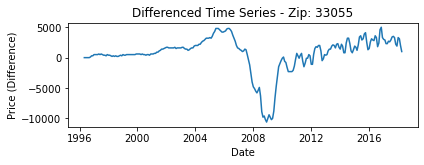

Zip:  33161
ADF Statistic -3.614701
p-value: 0.005486


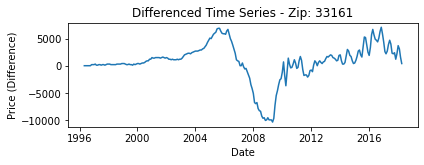

Zip:  33177
ADF Statistic -2.935156
p-value: 0.041410


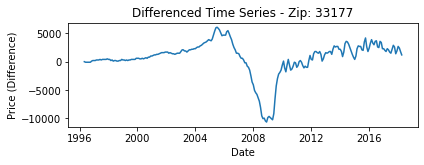

Zip:  33189
ADF Statistic -2.824817
p-value: 0.054815


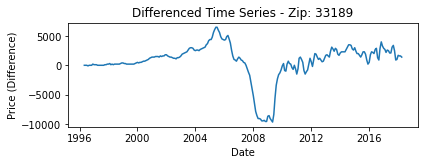

Zip:  33162
ADF Statistic -2.889609
p-value: 0.046570


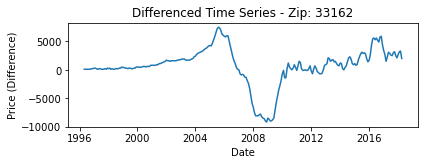

In [25]:
 # Iterate over each zip code in the list of selected zip codes
for z in selected_zipcodes:
    # Extract data for the current zip code from the DataFrame
    df_z = dade_df[dade_df['Zipcode'] == z] # Perform differencing to make the time series stationary
    df_z['Price_diff'] = df_z['Price'].diff()
    
    # Plot the differenced time series
    plt.subplot(2, 1, 2)
    plt.plot(df_z.index, df_z['Price_diff'])
    plt.title('Differenced Time Series - Zip: ' + z)
    plt.xlabel('Date')
    plt.ylabel('Price (Difference)')
    
    # Perform Augmented Dickey-Fuller test on the differenced values of the current zip code
    result = adfuller(df_z['Price_diff'].dropna())
    
    # Print out the results
    print('Zip: ', z)
    print('ADF Statistic %f' % result[0])
    print('p-value: %f' % result[1])
    
    # Show the plots
    plt.tight_layout()
    plt.show()


Based on the ADF test results:

Zip codes 33055, 33161, and 33177 are likely stationary after the transformation, with zip code 33161 having the most significant evidence of stationarity. Zip codes 33189 and 33162 might also be stationary after the transformation, but the evidence is less strong compared to the other zip codes. These results indicate strong evidence against the null hypothesis of non-stationarity. Therefore, we conclude that the differenced time series data is likely stationary.

### 4.3 Difference  and Autocorrelation Plots